## Convolutional Neural Networks

## Project: Identify/Classify Router Device Light Combinations with building CNN from scratch
### (Without Image Augmentation)

----

Dataset -
        
        data/train
        
        data/valid
        
        data/test
        


In [56]:
%matplotlib inline
import numpy as np
from sklearn.datasets import load_files
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import cv2
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.utils.np_utils import to_categorical
import glob
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
from tqdm import tqdm
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input

In [57]:
def load_dataset(path):
    data = load_files(path)
    img_files = np.array(data['filenames'])
    img_targets = np_utils.to_categorical(np.array(data['target']), 8)
    return img_files, img_targets


In [58]:
# load train, test, and validation datasets
train_files, train_targets = load_dataset('./data/train')
valid_files, valid_targets = load_dataset('./data/valid')
test_files, test_targets = load_dataset('./data/test')

# load list of dog names
router_classification_names = [item[13:-1] for item in sorted(glob.glob("./data/train/*/"))]

# print statistics about the dataset
print('There are %d total router classification categories.' % len(router_classification_names))
print('There are %s total router classification images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training router classification images.' % len(train_files))
print('There are %d validation router classification images.' % len(valid_files))
print('There are %d test router classification images.' % len(test_files))

There are 3 total router classification categories.
There are 1950 total router classification images.

There are 1500 training router classification images.
There are 300 validation router classification images.
There are 150 test router classification images.


In [59]:
def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(1066, 150))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)


In [60]:
def path_to_tensor1(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(1066, 150))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)



In [61]:
def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)
    

In [62]:
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu',
                input_shape=(1066, 150, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(8, activation='softmax'))

model.summary()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])




  0%|          | 0/1500 [00:00<?, ?it/s]


  1%|          | 10/1500 [00:00<00:15, 95.31it/s]


  1%|▏         | 21/1500 [00:00<00:15, 97.15it/s]


  2%|▏         | 31/1500 [00:00<00:15, 95.84it/s]


  3%|▎         | 41/1500 [00:00<00:15, 95.15it/s]


  3%|▎         | 51/1500 [00:00<00:15, 96.10it/s]


  4%|▍         | 61/1500 [00:00<00:14, 96.03it/s]


  5%|▍         | 71/1500 [00:00<00:14, 97.00it/s]


  5%|▌         | 81/1500 [00:00<00:14, 96.82it/s]


  6%|▌         | 91/1500 [00:00<00:14, 95.55it/s]


  7%|▋         | 102/1500 [00:01<00:14, 97.19it/s]


  7%|▋         | 112/1500 [00:01<00:14, 97.92it/s]


  8%|▊         | 122/1500 [00:01<00:14, 96.84it/s]


  9%|▉         | 132/1500 [00:01<00:14, 96.64it/s]


  9%|▉         | 142/1500 [00:01<00:13, 97.53it/s]


 10%|█         | 152/1500 [00:01<00:13, 97.19it/s]


 11%|█         | 162/1500 [00:01<00:13, 96.44it/s]


 11%|█▏        | 172/1500 [00:01<00:15, 84.58it/s]


 12%|█▏        | 181/1500 [00:02<00:18, 71.12it/s]


 13%|█▎  

 80%|███████▉  | 1197/1500 [00:14<00:03, 78.77it/s]


 80%|████████  | 1205/1500 [00:14<00:03, 77.66it/s]


 81%|████████  | 1214/1500 [00:15<00:03, 79.47it/s]


 82%|████████▏ | 1223/1500 [00:15<00:03, 81.28it/s]


 82%|████████▏ | 1232/1500 [00:15<00:03, 80.73it/s]


 83%|████████▎ | 1241/1500 [00:15<00:03, 80.57it/s]


 83%|████████▎ | 1251/1500 [00:15<00:02, 84.09it/s]


 84%|████████▍ | 1261/1500 [00:15<00:02, 87.68it/s]


 85%|████████▍ | 1271/1500 [00:15<00:02, 90.73it/s]


 85%|████████▌ | 1281/1500 [00:15<00:02, 92.73it/s]


 86%|████████▌ | 1291/1500 [00:15<00:02, 94.08it/s]


 87%|████████▋ | 1302/1500 [00:15<00:02, 96.52it/s]


 87%|████████▋ | 1312/1500 [00:16<00:02, 92.93it/s]


 88%|████████▊ | 1322/1500 [00:16<00:01, 93.09it/s]


 89%|████████▉ | 1332/1500 [00:16<00:01, 92.74it/s]


 89%|████████▉ | 1342/1500 [00:16<00:01, 92.25it/s]


 90%|█████████ | 1352/1500 [00:16<00:01, 89.96it/s]


 91%|█████████ | 1362/1500 [00:16<00:01, 90.67it/s]


 91%|█████████▏| 1372/1500 [

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 1066, 150, 16)     208       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 533, 75, 16)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 533, 75, 32)       2080      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 266, 37, 32)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 266, 37, 64)       8256      
_________________________________________________________________
flatten_3 (Flatten)          (None, 629888)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               161251584 
__________

In [63]:

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 8

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='./weights.best.from_scratch1.hdf5',
                               verbose=1, save_best_only=True)

batch_size = 16
history = model.fit(train_tensors, train_targets,
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer], verbose=1)

model.load_weights('./weights.best.from_scratch1.hdf5')

Train on 1500 samples, validate on 300 samples
Epoch 1/8
1500/1500 [==============================] - 228s 152ms/step - loss: 1.4328 - acc: 0.8747 - val_loss: 0.0094 - val_acc: 1.0000

Epoch 00001: val_loss improved from inf to 0.00936, saving model to ./weights.best.from_scratch1.hdf5
Epoch 2/8
1500/1500 [==============================] - 219s 146ms/step - loss: 0.0030 - acc: 0.9987 - val_loss: 0.1293 - val_acc: 0.9733

Epoch 00002: val_loss did not improve from 0.00936
Epoch 3/8
1500/1500 [==============================] - 220s 147ms/step - loss: 6.4212e-04 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 00003: val_loss improved from 0.00936 to 0.00108, saving model to ./weights.best.from_scratch1.hdf5
Epoch 4/8
1500/1500 [==============================] - 219s 146ms/step - loss: 3.0048e-05 - acc: 1.0000 - val_loss: 0.0052 - val_acc: 0.9967

Epoch 00004: val_loss did not improve from 0.00108
Epoch 5/8
1500/1500 [==============================] - 220s 147ms/step - loss: 0.02

In [64]:
(eval_loss, eval_accuracy) = model.evaluate(
        valid_tensors, valid_targets, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
print("[INFO] Loss: {}".format(eval_loss))

300/300 [==============================] - 9s 29ms/step
[INFO] accuracy: 100.00%
[INFO] Loss: 3.453097425108354e-05


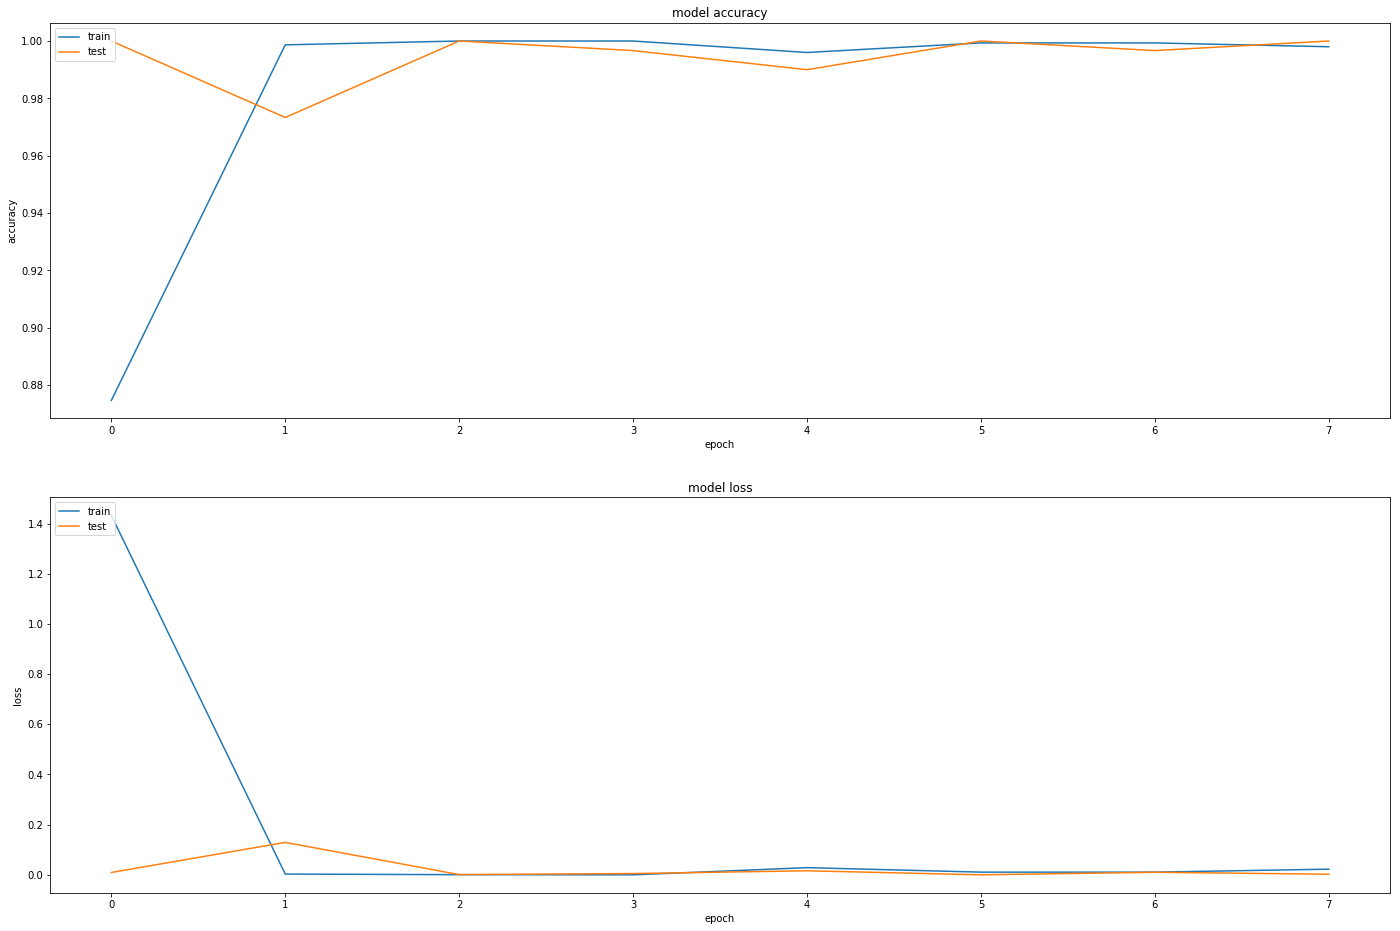

In [65]:
IMAGE_SIZE = (24, 16)
plt.figure(figsize=IMAGE_SIZE)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [66]:
predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(predictions)==np.argmax(test_targets, axis=1))/len(predictions)
print('Test accuracy: %.4f%%' % test_accuracy)


Test accuracy: 100.0000%


In [82]:
def predict_image(image_path):
    img = preprocess_input(path_to_tensor(image_path))
    prediction = router_classification_names[np.argmax(model.predict(img))]
    
    if prediction in image_path :
        print('prediction passed as', prediction)
    else :
        print('prediction Failed as', prediction)

In [83]:
predict_image('./data/test/PowerOn_Internet_1_2_3_4/PowerOn_Internet_1_2_3_4__169702.png')

prediction passed as PowerOn_Internet_1_2_3_4


In [84]:
predict_image('./data/test/PowerOn/PowerOn__246939.png')

prediction passed as PowerOn


In [85]:
predict_image('./data/test/PowerOn_2hz_5hz/PowerOn_2hz_5hz__473900.png')

prediction passed as PowerOn_2hz_5hz


In [86]:
mylist = [f for f in glob.glob("./data/test/PowerOn_Internet_1_2_3_4/*.png")]
for file in mylist:
    predict_image(file)

prediction passed as PowerOn_Internet_1_2_3_4
prediction passed as PowerOn_Internet_1_2_3_4
prediction passed as PowerOn_Internet_1_2_3_4
prediction passed as PowerOn_Internet_1_2_3_4
prediction passed as PowerOn_Internet_1_2_3_4
prediction passed as PowerOn_Internet_1_2_3_4
prediction passed as PowerOn_Internet_1_2_3_4
prediction passed as PowerOn_Internet_1_2_3_4
prediction passed as PowerOn_Internet_1_2_3_4
prediction passed as PowerOn_Internet_1_2_3_4
prediction passed as PowerOn_Internet_1_2_3_4
prediction passed as PowerOn_Internet_1_2_3_4
prediction passed as PowerOn_Internet_1_2_3_4
prediction passed as PowerOn_Internet_1_2_3_4
prediction passed as PowerOn_Internet_1_2_3_4
prediction passed as PowerOn_Internet_1_2_3_4
prediction passed as PowerOn_Internet_1_2_3_4
prediction passed as PowerOn_Internet_1_2_3_4
prediction passed as PowerOn_Internet_1_2_3_4
prediction passed as PowerOn_Internet_1_2_3_4
prediction passed as PowerOn_Internet_1_2_3_4
prediction passed as PowerOn_Inter

In [87]:
mylist = [f for f in glob.glob("./data/test/PowerOn_2hz_5hz/*.png")]
for file in mylist:
    predict_image(file)

prediction passed as PowerOn_2hz_5hz
prediction passed as PowerOn_2hz_5hz
prediction passed as PowerOn_2hz_5hz
prediction passed as PowerOn_2hz_5hz
prediction passed as PowerOn_2hz_5hz
prediction passed as PowerOn_2hz_5hz
prediction passed as PowerOn_2hz_5hz
prediction passed as PowerOn_2hz_5hz
prediction passed as PowerOn_2hz_5hz
prediction passed as PowerOn_2hz_5hz
prediction passed as PowerOn_2hz_5hz
prediction passed as PowerOn_2hz_5hz
prediction passed as PowerOn_2hz_5hz
prediction passed as PowerOn_2hz_5hz
prediction passed as PowerOn_2hz_5hz
prediction passed as PowerOn_2hz_5hz
prediction passed as PowerOn_2hz_5hz
prediction passed as PowerOn_2hz_5hz
prediction passed as PowerOn_2hz_5hz
prediction passed as PowerOn_2hz_5hz
prediction passed as PowerOn_2hz_5hz
prediction passed as PowerOn_2hz_5hz
prediction passed as PowerOn_2hz_5hz
prediction passed as PowerOn_2hz_5hz
prediction passed as PowerOn_2hz_5hz
prediction passed as PowerOn_2hz_5hz
prediction passed as PowerOn_2hz_5hz
p

In [88]:
mylist = [f for f in glob.glob("./data/test/PowerOn/*.png")]
for file in mylist:
    predict_image(file)

prediction passed as PowerOn
prediction passed as PowerOn
prediction passed as PowerOn
prediction passed as PowerOn
prediction passed as PowerOn
prediction passed as PowerOn
prediction passed as PowerOn
prediction Failed as PowerOn_2hz_5hz
prediction Failed as PowerOn_2hz_5hz
prediction passed as PowerOn
prediction passed as PowerOn
prediction passed as PowerOn
prediction passed as PowerOn
prediction Failed as PowerOn_2hz_5hz
prediction Failed as PowerOn_2hz_5hz
prediction passed as PowerOn
prediction passed as PowerOn
prediction passed as PowerOn
prediction passed as PowerOn
prediction passed as PowerOn
prediction Failed as PowerOn_2hz_5hz
prediction passed as PowerOn
prediction passed as PowerOn
prediction Failed as PowerOn_2hz_5hz
prediction passed as PowerOn
prediction passed as PowerOn
prediction Failed as PowerOn_2hz_5hz
prediction Failed as PowerOn_2hz_5hz
prediction passed as PowerOn
prediction Failed as PowerOn_2hz_5hz
prediction passed as PowerOn
prediction passed as PowerOn
